### 2. Анализ выборки.

In [1]:
import pandas as pd

# Считываем данные из файла dataset.csv
df = pd.read_csv('dataset.csv')

# Выводим первые строки для проверки
print(df.head())


   Unnamed: 0   velocity         a         b
0           0   1.019397  0.167234  0.162017
1           1   1.825888  0.142229  0.379670
2           2  11.949047  0.136906  0.437636
3           3  17.216688  0.060860  0.303924
4           4  19.394578  0.000000  0.029671


In [2]:
# Определяем первый, второй и третий квартили
q1 = df['velocity'].quantile(0.25)
q2 = df['velocity'].quantile(0.5)  # Второй квартиль равен медиане
q3 = df['velocity'].quantile(0.75)

print("Первый квартиль (25-й перцентиль):", q1)
print("Второй квартиль (медиана):", q2)
print("Третий квартиль (75-й перцентиль):", q3)

# Создаем DataFrame с квартилями
quartiles = pd.DataFrame({'Quartile': ['Q1', 'Q2', 'Q3'], 'Value': [q1, q2, q3]})

# Записываем DataFrame в файл
quartiles.to_csv('quartiles.csv', index=False)

Первый квартиль (25-й перцентиль): 72.92466872803865
Второй квартиль (медиана): 152.35004177454806
Третий квартиль (75-й перцентиль): 228.10222182719303


##### Линейная регрессия

In [3]:
from sklearn.linear_model import LinearRegression

# Создаем объект линейной регрессии
model = LinearRegression()

# Обучаем модель на данных
a = df[['a']]# Параметр a
v = df['velocity']    # Скорость
v = v.values.reshape(-1, 1)
model.fit(v, a)

# Получаем коэффициенты модели
a1 = model.coef_[0].item()  # Наклон (slope)
a2 = model.intercept_.item()  # Пересечение (intercept)

print(f'Коэффициенты регрессии: {a1}, смещение: {a2}')
print("Уравнение линейной регрессии: a = {:.2f} * v + {:.2f}".format(a1, a2))

# Создаем DataFrame с квартилями
quartiles = pd.DataFrame({'Parameter': ['a'], 'Slope': [a1], 'Intercept': [a2]})

# Записываем DataFrame в файл
quartiles.to_csv('coeff.csv', index=False)

Коэффициенты регрессии: 0.00314357411919967, смещение: 0.08989234270847818
Уравнение линейной регрессии: a = 0.00 * v + 0.09


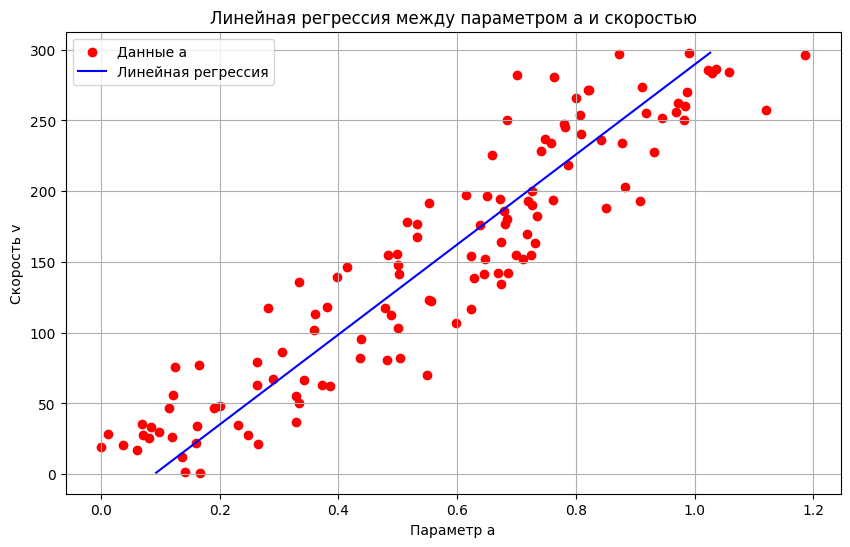

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Функция нахождения параметра a
def find_a(v, a1, a2):
    a = a1 * v + a2
    return a
    
x = df[['a']]
y = df['velocity']  

# Вычисление значений скорости v согласно уравнению линейной регрессии
a = find_a(y, a1, a2)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='r', label='Данные a')
plt.plot(a, y, color='blue', label='Линейная регрессия')
plt.ylabel('Скорость v')
plt.xlabel('Параметр a')
plt.title('Линейная регрессия между параметром a и скоростью')
plt.legend()
plt.grid(True)
plt.show()


##### Зависимость параметра b от квадрата скорости

In [5]:
from sklearn.linear_model import LinearRegression

#Данные о параметре b и квадрате скорости
b = df[['b']]
v2 = df[['velocity']]**2

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(v2, b)
# Получаем коэффициенты модели
a1 = model.coef_[0].item()  # Наклон (slope)
a2 = model.intercept_.item() # Пересечение (intercept)
# Выводим коэффициенты регрессии
print("Коэффициент наклона:", a1)
print("Свободный член:", a2)
print("Уравнение регрессии: b = {:.2f}*v^2 + {:.2f}".format(a1, a2))

# Создаем DataFrame с параметрами
quartiles = pd.DataFrame({'Parameter': ['b'], 'Slope': [a1], 'Intercept': [a2]})

# Записываем DataFrame в файл 
with open('coeff.csv', 'a') as file:
    quartiles.to_csv(file, header=False, index=False)

Коэффициент наклона: 4.6069881723322564e-05
Свободный член: 0.4233857120270905
Уравнение регрессии: b = 0.00*v^2 + 0.42


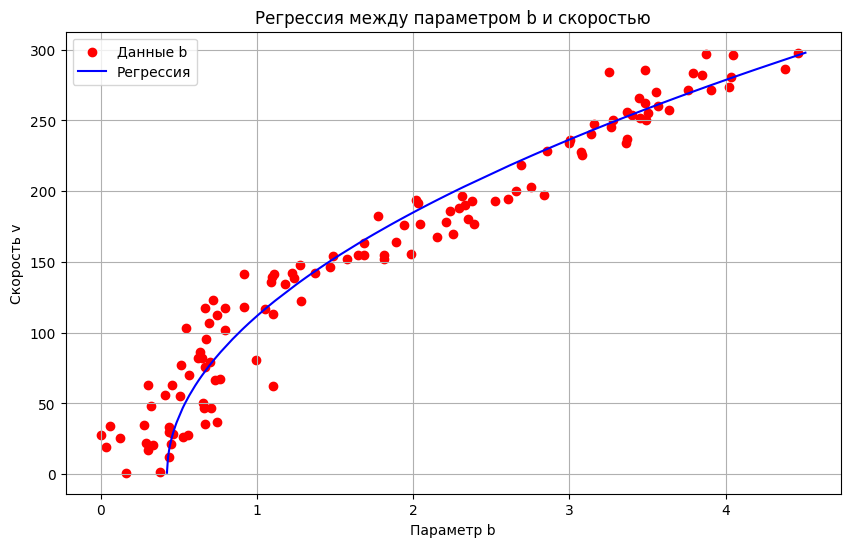

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Функция нахождения параметра b
def find_b(v, a1, a2):
    b = a1 * v**2 + a2
    return b

x = df[['b']]
y = df['velocity'] 

# Вычисление значений скорости v согласно уравнению регрессии
b = find_b(y, a1, a2)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='r', label='Данные b')
plt.plot(b, y, color='blue', label='Регрессия')
plt.xlabel('Параметр b')
plt.ylabel('Скорость v')
plt.title('Регрессия между параметром b и скоростью')
plt.legend()
plt.grid(True)
plt.show()
